## **Importing the libraries**


In [1]:
import numpy as np #working with array and ds
import pandas as pd #useful for importing dataset
import matplotlib.pyplot as plt #useful for making plots and graphs
import seaborn as sns #useful in regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## **Data collection and Processing** 

In [2]:
#loading csv data to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
#printing the first 5 row to check data 
#note : spx-> stocks , gld -> gold value ,  uso -> us pricing , slv -> silver price value.
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#function to get some basic information 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing value(if any)
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting statistica measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# **Co-relation between the data set**
1. Positive Co-relation 
2. Negative Co-relation

In [10]:
correlation = gold_data.corr()

<Axes: >

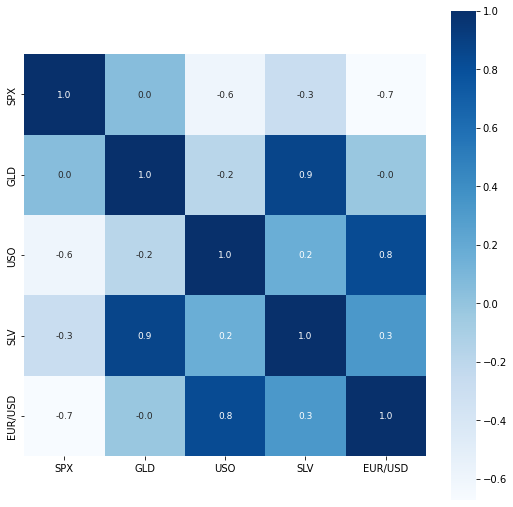

In [30]:
#constructing heat map to understand the relations
plt.figure(figsize = (9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':9}, cmap='Blues')

In [31]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-32-86e3f94934e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

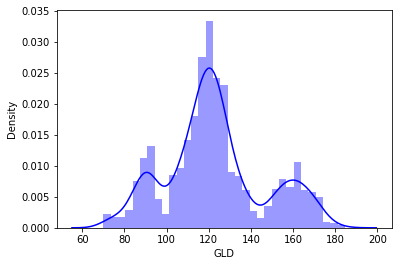

In [32]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

## Splitting the Features and Target

In [33]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Model Training: Random Forest Regressor

In [36]:
#Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model evaluation

In [39]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.56849876  82.01539974 116.155      127.64030056 120.7758016
 154.68589749 150.0983978  126.16360041 117.34999871 126.16810015
 116.49090138 172.26680112 141.59639849 168.02199816 115.25310004
 117.36840076 139.80870316 170.24130149 159.3712031  155.99149968
 155.08430015 125.2722002  175.85719995 157.40610294 125.16710044
  93.95239968  77.00550034 120.8325001  118.995299   167.52019963
  88.08220055 125.39760022  91.23040093 117.61040026 121.09429925
 136.473301   115.69080127 115.24180067 147.78450011 107.11720103
 104.11310238  87.16669779 126.48220007 117.7915002  152.50959922
 119.59929964 108.50269951 108.24749802  93.10950031 126.9884982
  75.57870005 113.61229938 121.50879999 111.32069948 118.95159898
 120.78179958 159.89570016 168.73740143 147.26769682  85.90009888
  94.19510026  86.96089842  90.61270023 118.87460136 126.41390013
 127.71010026 169.87350081 122.36989911 117.51079909  98.44400003
 168.2503012  143.11549825 131.71840259 121.26230225 120.85299913
 119.6631005

In [41]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9882299026751614


# Compare the Actual Values and Predicted Values in a Plot

In [42]:
Y_test = list(Y_test)

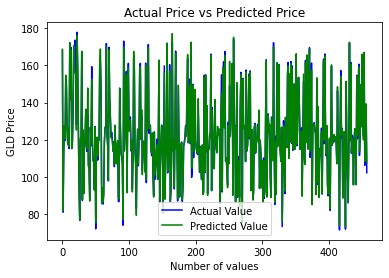

In [43]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()